In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#impot the data set
df=pd.read_csv("sales project 1.csv")

In [3]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [4]:
df.tail()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
185945,13617,222905,AAA Batteries (4-pack),1,2.99,6/7/2019 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,6/1/2019 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,6/22/2019 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,6/26/2019 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18
185949,13621,222909,AAA Batteries (4-pack),1,2.99,6/25/2019 14:33,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta,14


In [5]:
df.shape

(185950, 11)

In [6]:
df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


# Data cleaning and preprocessing

In [9]:
 #Handle missing value 
df.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [10]:
#find the duplicates values 
duplicates = df[df.duplicated(subset='Order ID')]
print(duplicates)

        Unnamed: 0  Order ID                     Product  Quantity Ordered  \
17              17    295681        USB-C Charging Cable                 1   
18              18    295681  Bose SoundSport Headphones                 1   
19              19    295681            Wired Headphones                 1   
37              37    295698        USB-C Charging Cable                 2   
43              43    295703  Bose SoundSport Headphones                 1   
...            ...       ...                         ...               ...   
185899       13571    222863  Bose SoundSport Headphones                 1   
185905       13577    222868    Apple Airpods Headphones                 1   
185920       13592    222882       AA Batteries (4-pack)                 1   
185923       13595    222884        USB-C Charging Cable                 1   
185943       13615    222903    Lightning Charging Cable                 1   

        Price Each        Order Date                         Pu

In [11]:
df.drop_duplicates(subset='Order ID', keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
178432,13617,222905,AAA Batteries (4-pack),1,2.99,6/7/2019 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
178433,13618,222906,27in FHD Monitor,1,149.99,6/1/2019 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City,19
178434,13619,222907,USB-C Charging Cable,1,11.95,6/22/2019 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
178435,13620,222908,USB-C Charging Cable,1,11.95,6/26/2019 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


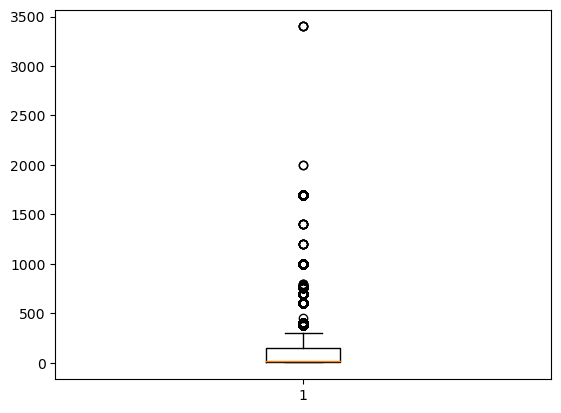

In [12]:
#find the outliers

# Create a box plot for the 'Sales' column
plt.boxplot(df['Sales'])

# Show the plot
plt.show()


<AxesSubplot:>

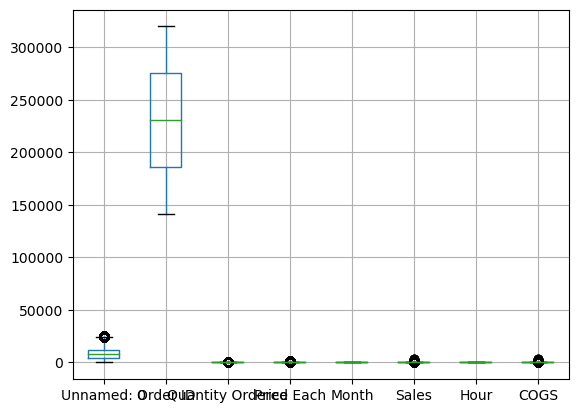

In [39]:
df.boxplot()

In [ ]:
#romove outliers 
# from scipy import stats

# z_scores = stats.zscore(df['Sales'])
# z_threshold = 2
# is_outlier = abs(z_scores) > z_threshold
# df_no_outliers = df[~is_outlier]


# Exploratory Data Analysis (EDA):



In [14]:
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,178437.000000,178437.000000,178437.000000,178437.000000,178437.000000,178437.000000,178437.000000
mean,8342.699973,230452.000000,1.125596,187.611323,7.061495,188.703013,14.411916
std,5450.990863,51510.469329,0.445198,335.317522,3.502690,335.513390,5.423222
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3895.000000,185843.000000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7788.000000,230452.000000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11873.000000,275061.000000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


<AxesSubplot:xlabel='Sales', ylabel='Count'>

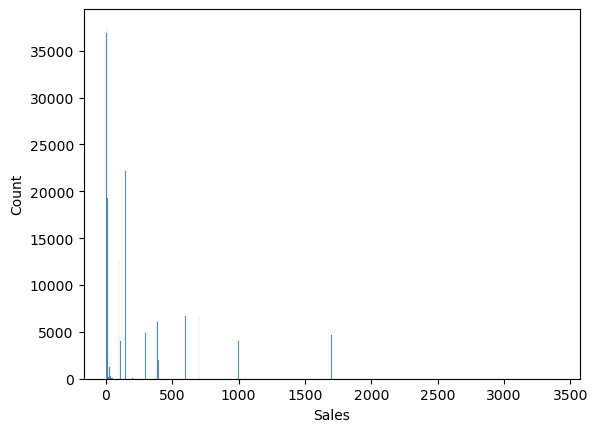

In [15]:
#Histrogram plots
sns.histplot(data=df['Sales'])

<AxesSubplot:xlabel='Quantity Ordered', ylabel='Count'>

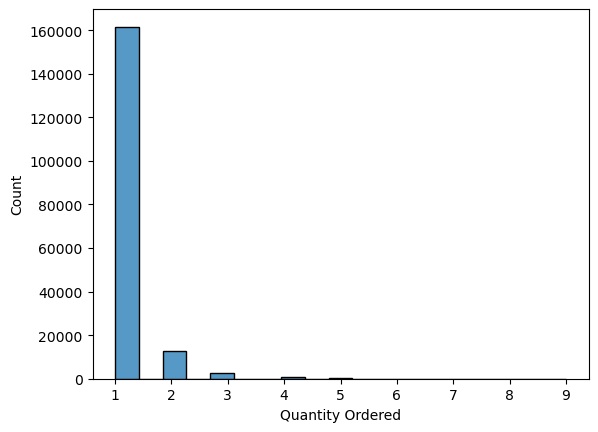

In [16]:
sns.histplot(data=df['Quantity Ordered'])

<AxesSubplot:xlabel='Price Each', ylabel='Count'>

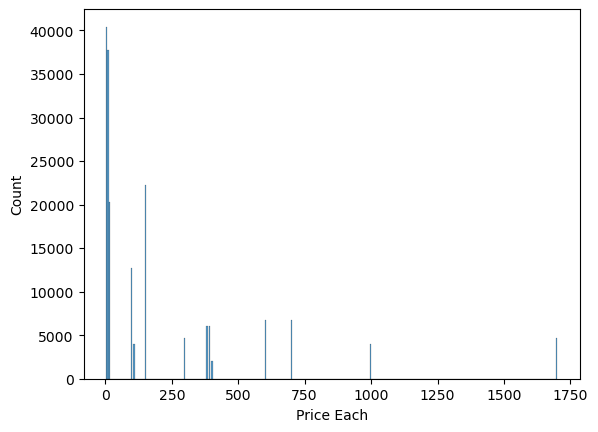

In [17]:
sns.histplot(data=df['Price Each'])

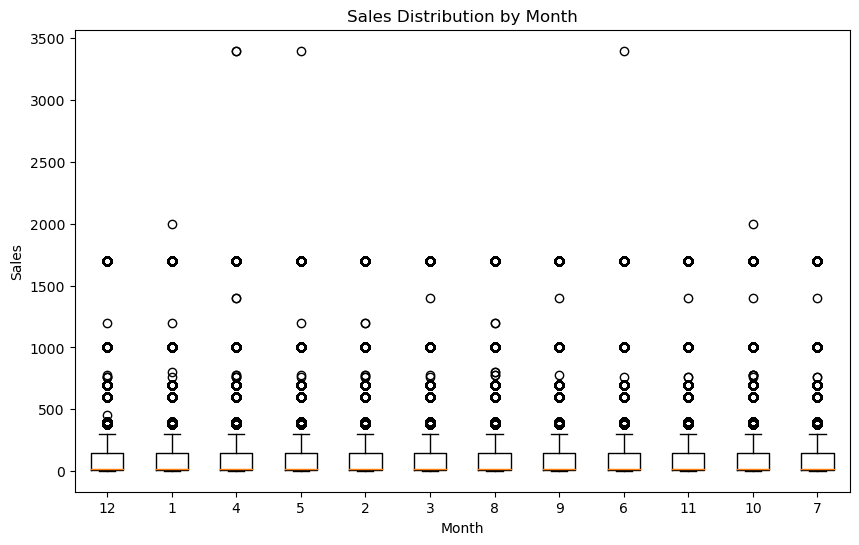

In [18]:


# Assuming you have a DataFrame 'df' with columns 'Month' and 'Sales'
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Create a box plot to compare sales distribution by month
plt.boxplot([df[df['Month'] == month]['Sales'] for month in df['Month'].unique()])
plt.xticks(range(1, len(df['Month'].unique()) + 1), df['Month'].unique())  # Set X-axis labels

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Distribution by Month')

# Show the plot
plt.show()


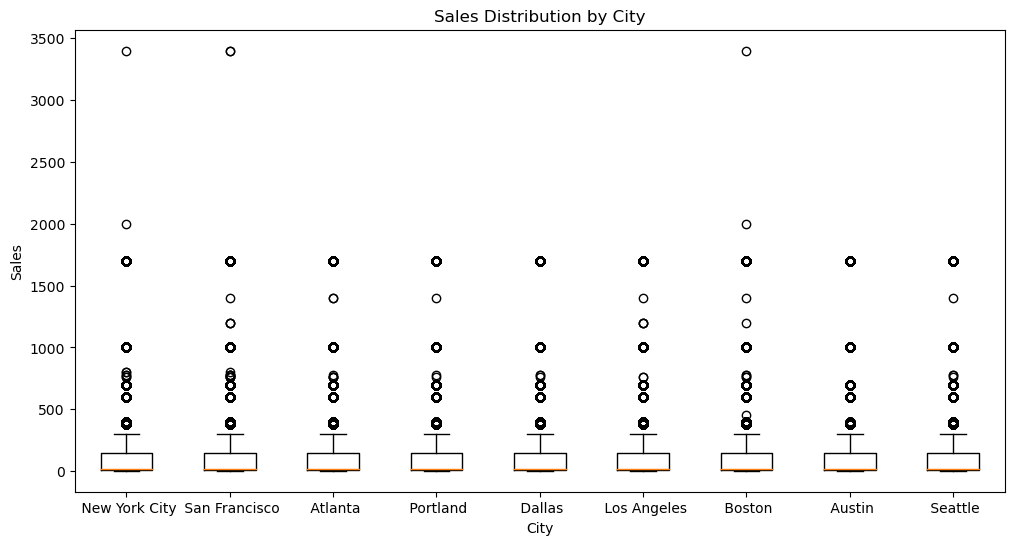

In [19]:
# Assuming you have a DataFrame 'df' with columns 'City' and 'Sales'
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed

# Create a box plot to compare sales distribution by city
cities = df['City'].unique()
data_by_city = [df[df['City'] == city]['Sales'] for city in cities]

plt.boxplot(data_by_city, labels=cities)

# Set labels and title
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Sales Distribution by City')

# Show the plot
plt.show()


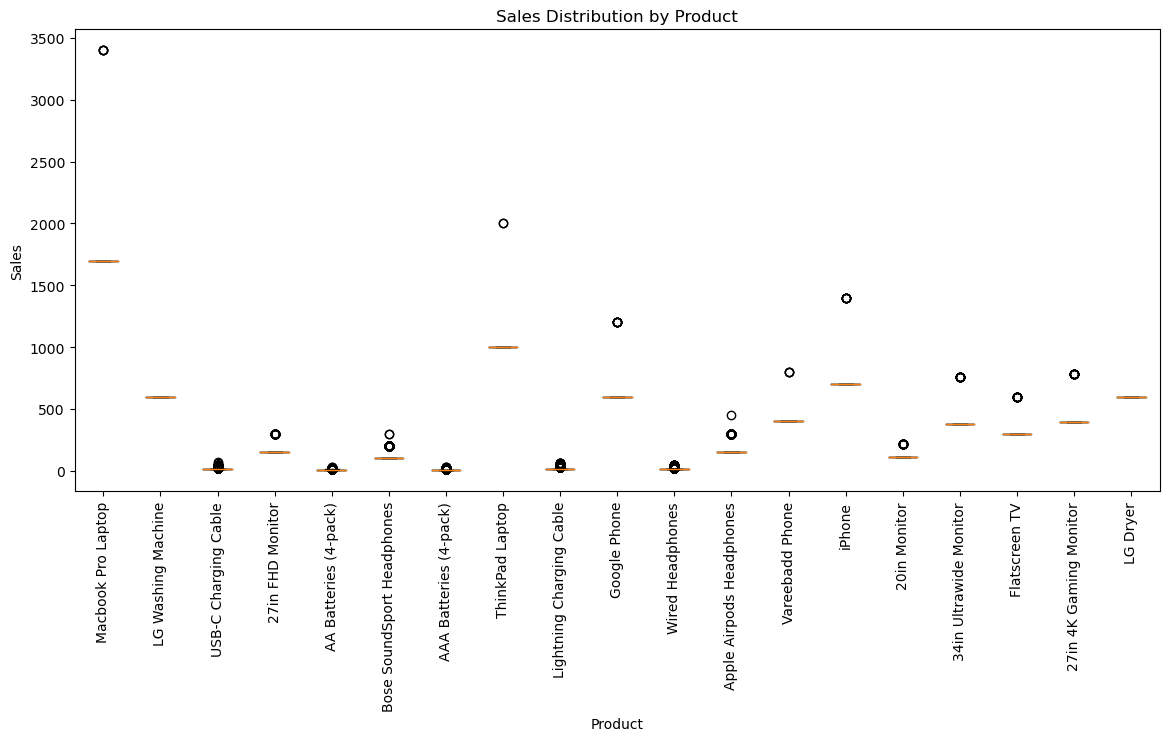

In [20]:
# Assuming you have a DataFrame 'df' with columns 'Product' and 'Sales'
plt.figure(figsize=(14, 6))  # Adjust the figure size if needed

# Create a box plot to compare sales distribution by product
products = df['Product'].unique()
data_by_product = [df[df['Product'] == product]['Sales'] for product in products]

plt.boxplot(data_by_product, labels=products)

# Set labels and title
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Sales Distribution by Product')

# Show the plot
plt.xticks(rotation=90)  # Rotate X-axis labels for better readability
plt.show()


<AxesSubplot:xlabel='Order ID', ylabel='Sales'>

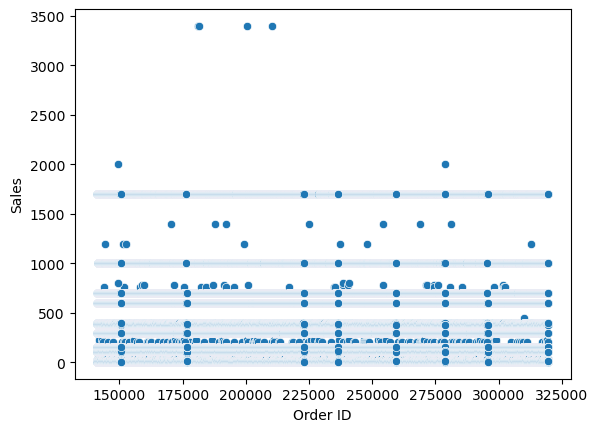

In [21]:
sns.scatterplot(data=df,x="Order ID",y="Sales")

<AxesSubplot:xlabel='Price Each', ylabel='Sales'>

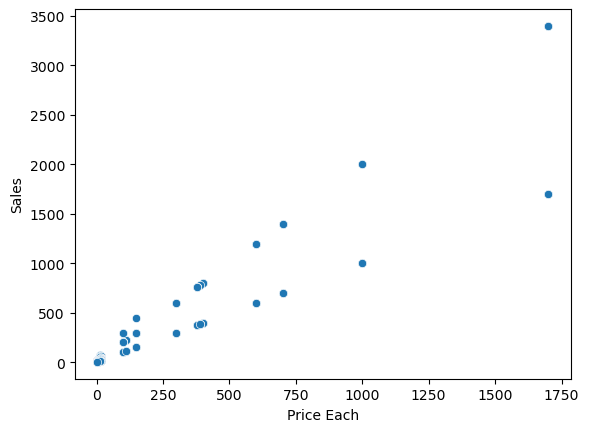

In [22]:
sns.scatterplot(data=df,x='Price Each',y="Sales")

<AxesSubplot:xlabel='Price Each', ylabel='Sales'>

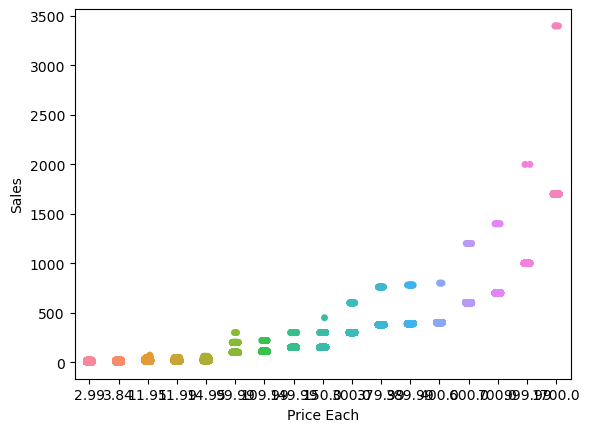

In [23]:
sns.stripplot(data=df,x='Price Each',y="Sales")

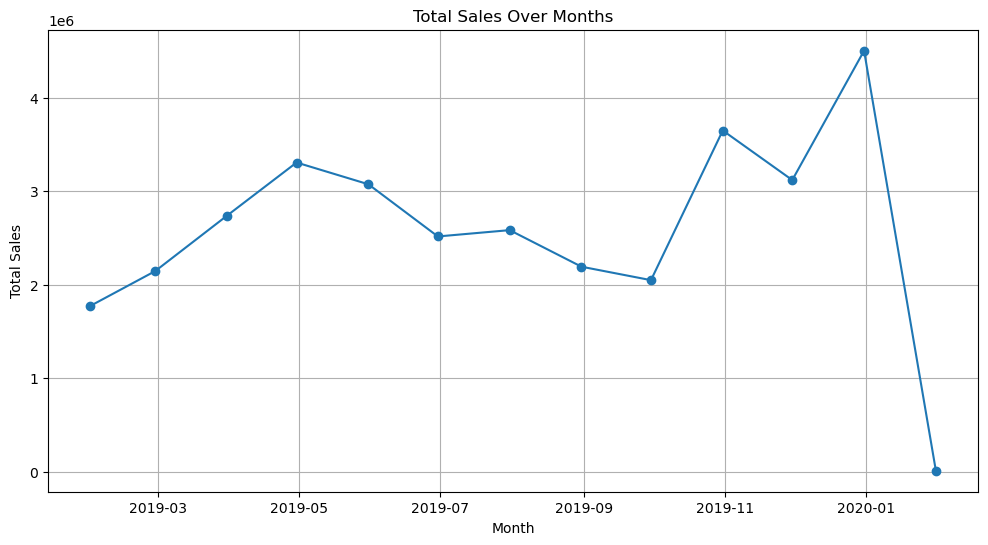

In [24]:


# Assuming you have a DataFrame 'df' with an 'Order Date' column and a 'Sales' column
# Ensure the 'Order Date' column is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group sales data by month
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

# Create a line plot for total sales over months
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed

plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Months')

# Show the plot
plt.grid(True)
plt.show()


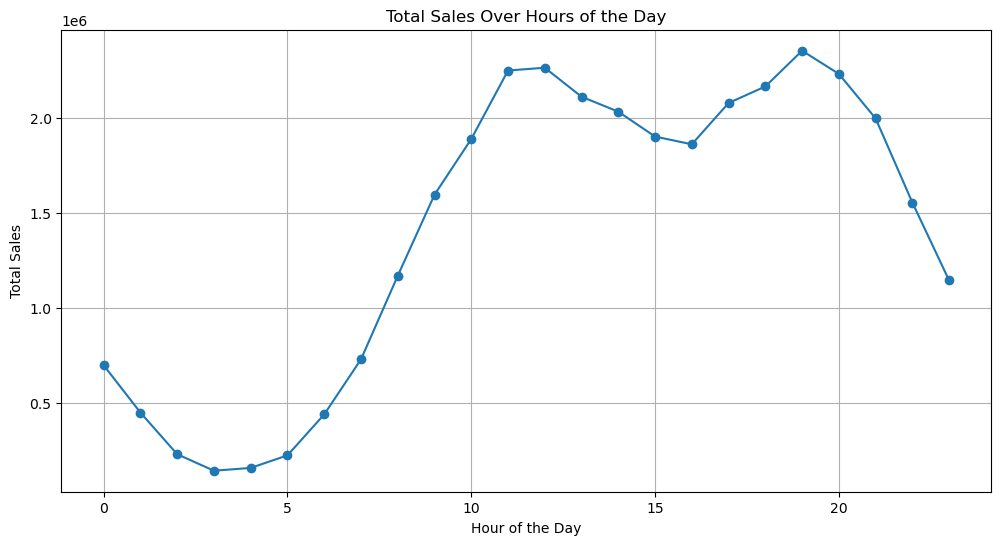

In [25]:
# Assuming you have a DataFrame 'df' with an 'Order Date' column and a 'Sales' column
# Ensure the 'Order Date' column is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract the hour from the 'Order Date' column
df['Hour'] = df['Order Date'].dt.hour

# Group sales data by hour
hourly_sales = df.groupby('Hour')['Sales'].sum()

# Create a line plot for total sales over hours
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed

plt.plot(hourly_sales.index, hourly_sales.values, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Hours of the Day')

# Show the plot
plt.grid(True)
plt.show()


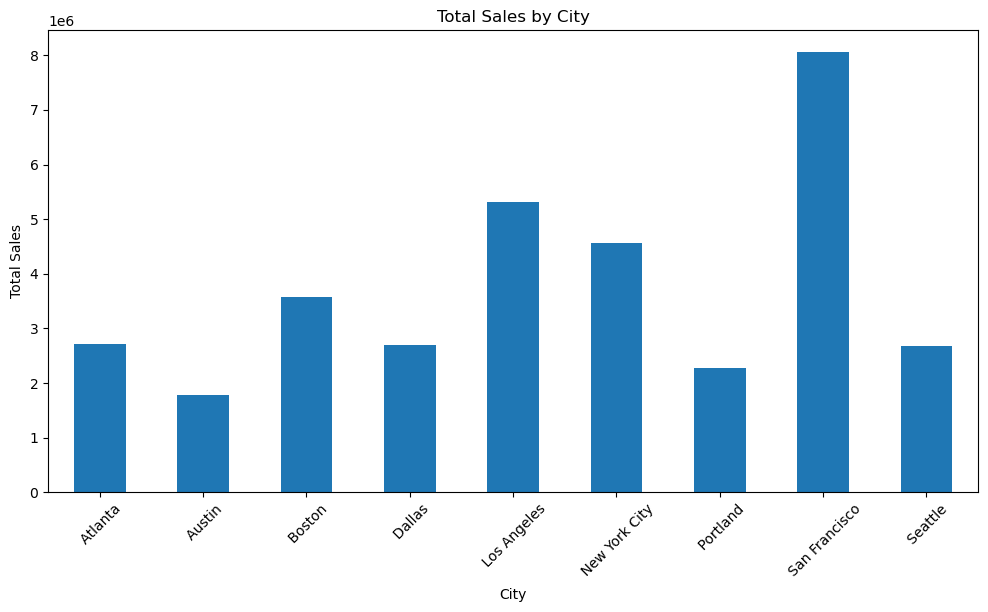

In [26]:

# Assuming you have a DataFrame 'df' with a 'City' column and a 'Sales' column
# Group sales data by city
city_sales = df.groupby('City')['Sales'].sum()

# Create a bar chart for sales by city
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed

city_sales.plot(kind='bar')

# Set labels and title
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales by City')

# Show the plot
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
plt.show()


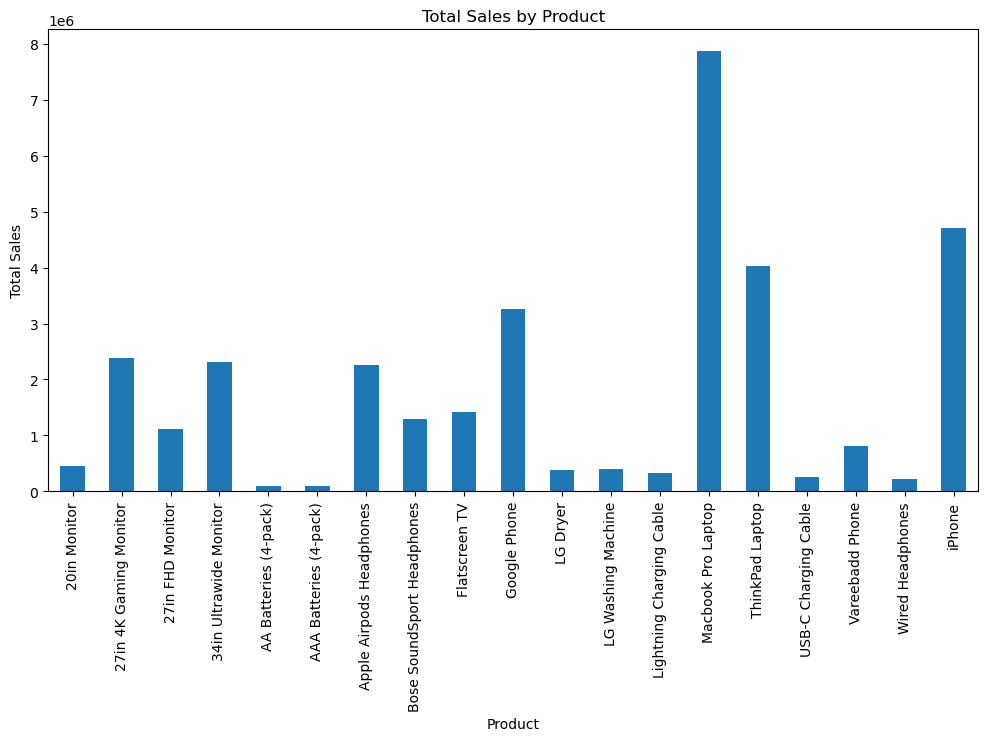

In [27]:
# Assuming you have a DataFrame 'df' with a 'Product' column and a 'Sales' column
# Group sales data by product
product_sales = df.groupby('Product')['Sales'].sum()

# Create a bar chart for sales by product
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed

product_sales.plot(kind='bar')

# Set labels and title
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product')

# Show the plot
plt.xticks(rotation=90)  # Rotate X-axis labels for better readability
plt.show()


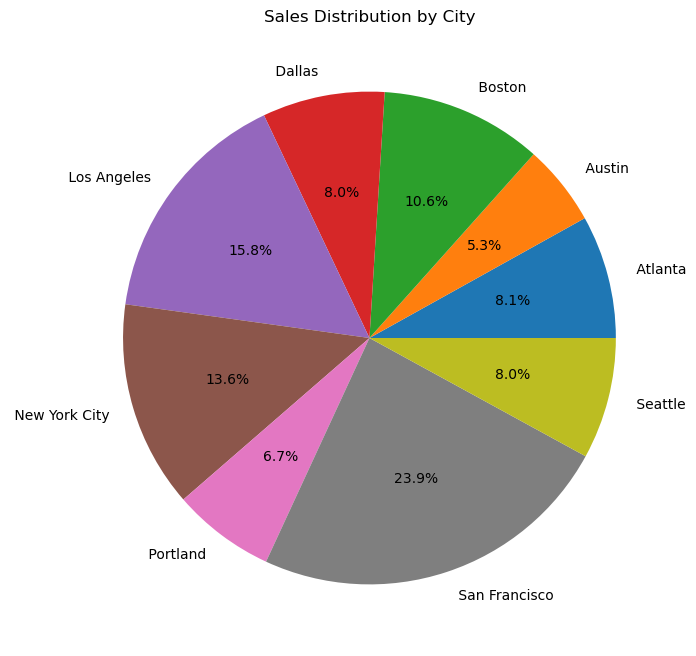

In [28]:
# Create a pie chart for sales distribution by city
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed

city_sales.plot(kind='pie', autopct='%1.1f%%')

# Set title
plt.title('Sales Distribution by City')

# Show the plot
plt.ylabel('')  # Remove the default label for the y-axis
plt.show()


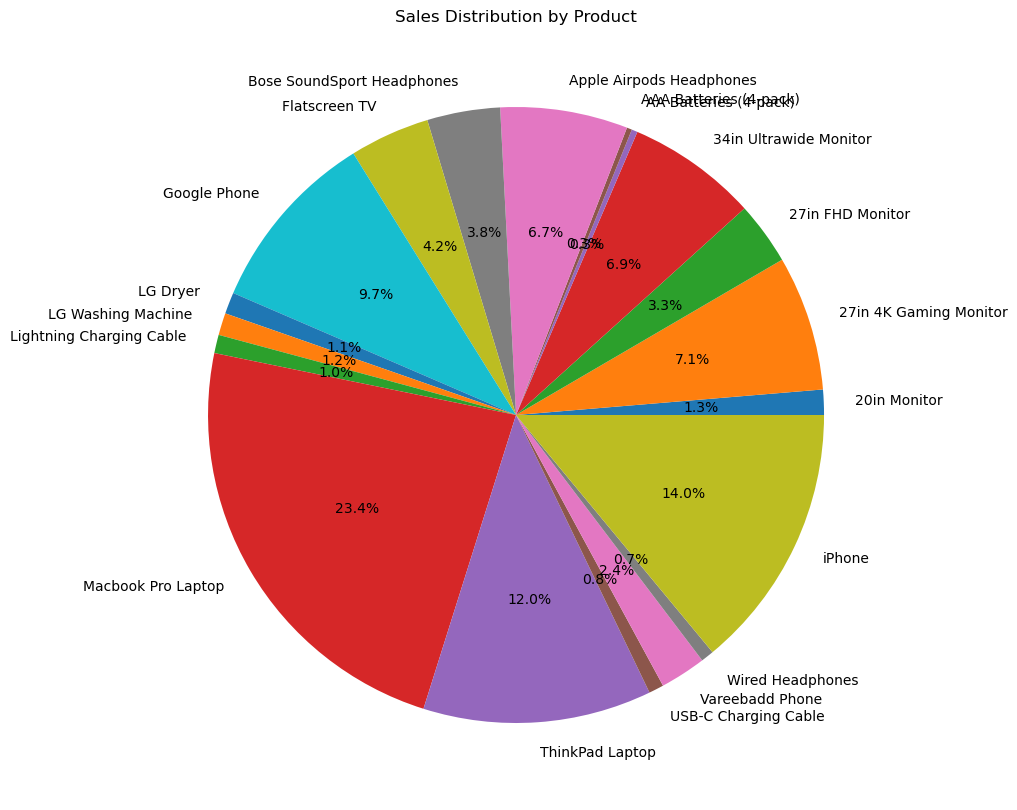

In [29]:
# Create a pie chart for sales distribution by product
plt.figure(figsize=(10, 10))  # Adjust the figure size if needed

product_sales.plot(kind='pie', autopct='%1.1f%%')

# Set title
plt.title('Sales Distribution by Product')

# Show the plot
plt.ylabel('')  # Remove the default label for the y-axis
plt.yticks(rotation=45)
plt.show()


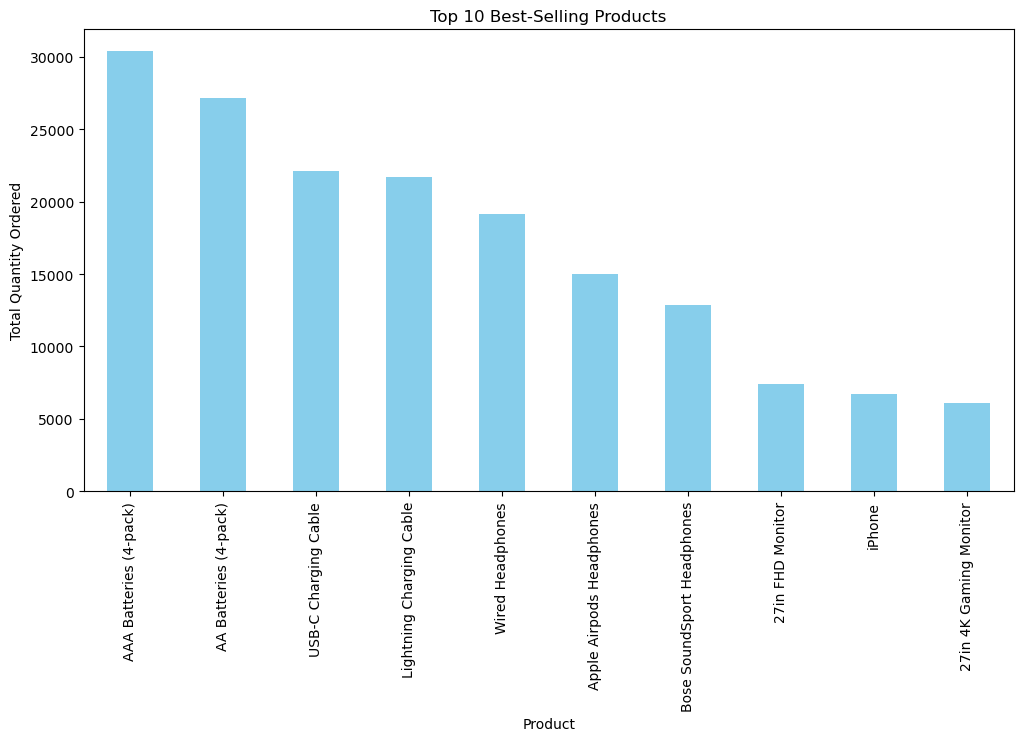

In [30]:

# Assuming you have a DataFrame 'df' with columns 'Product' and 'Quantity Ordered'

# Group data by product and calculate the total quantity ordered for each product
product_sales = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

# Select the top N best-selling products (e.g., top 10)
top_n = 10
top_selling_products = product_sales.head(top_n)

# Create a bar chart to visualize the top-selling products
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed

top_selling_products.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.title(f'Top {top_n} Best-Selling Products')

# Show the plot
plt.xticks(rotation=90)  # Rotate X-axis labels for better readability
plt.show()


In [33]:
# Calculate the 'COGS' column and add it to the DataFrame
df['COGS'] = df['Quantity Ordered'] * df['Price Each']


In [34]:
df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,COGS
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1700.00
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,600.00
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,11.95
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,149.99
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,11.95
...,...,...,...,...,...,...,...,...,...,...,...,...
178432,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,2.99
178433,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19,149.99
178434,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,11.95
178435,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,11.95


In [35]:
import pandas as pd

# Assuming you have a DataFrame 'df' with 'Sales' and 'COGS' columns

# Calculate Total Sales (Revenue)
total_sales = df['Sales'].sum()

# Calculate Total Cost of Goods Sold (COGS)
total_cost = df['COGS'].sum()

# Calculate Profit Margin Percentage
def calculate_profit_margin(total_sales, total_cost):
    if total_sales > 0:
        profit_margin = ((total_sales - total_cost) / total_sales) * 100
    else:
        profit_margin = 0  # To handle cases where total_sales is zero
    return profit_margin

profit_margin = calculate_profit_margin(total_sales, total_cost)

# Print the results
print(f"Total Sales (Revenue): ${total_sales:.2f}")
print(f"Total Cost of Goods Sold (COGS): ${total_cost:.2f}")
print(f"Profit Margin: {profit_margin:.2f}%")


Total Sales (Revenue): $33671599.47
Total Cost of Goods Sold (COGS): $33671599.47
Profit Margin: 0.00%


In [36]:

# Assuming you have a DataFrame 'df' with columns 'Product' and 'Sales'

# Group data by product and calculate the total sales for each product
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

# Find the best-selling product (product with the highest total sales)
best_selling_product = product_sales.idxmax()

# Print the best-selling product
print(f"The best-selling product is: {best_selling_product}")


The best-selling product is: Macbook Pro Laptop


In [37]:
 #Group data by product and calculate total sales for each product
product_sales = df.groupby('Product')['Sales'].sum().reset_index()

# Sort products by total sales in descending order
sorted_products = product_sales.sort_values(by='Sales', ascending=False)

# Get the best-selling product (product with the highest total sales)
best_selling_product = sorted_products.iloc[0]

# Print the best-selling product
print(f"The best-selling product to sell in the future is: {best_selling_product['Product']}")


The best-selling product to sell in the future is: Macbook Pro Laptop
